# Iterative methods for solving linear systems




Recall the prototypal PDE problem introduced in the Lecture 08:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, 1)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, 1\}
$$

For the numerical discretization of the problem, we consider a **Finite Difference (FD) Approximation**. Let $n$ be an integer, a consider a uniform subdivision of the interval $(0,1)$ using $n$ equispaced points, denoted by $\{x_i\}_{i=0}^n$ . Moreover, let $u_i$ be the FD approximation of $u(x_i)$, and similarly $f_i \approx f(x_i)$.

The linear system that we need to solve is
$$
u_i = 0 \qquad\qquad\qquad\qquad i=0,
$$
$$
\frac{-u_{i-1} + 2u_i - u_{i+1}}{h^2} = f_i \qquad\qquad\qquad i=1, \ldots, n-1,\qquad\qquad\qquad(P)
$$
$$
u_i = 0 \qquad\qquad\qquad\qquad i=n.
$$

In [13]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *

n = 33
h = 1./(n-1)

x=linspace(0,1,n)

a = -ones((n-1,)) # Offdiagonal entries
b = 2*ones((n,)) # Diagonal entries
A = (diag(a, -1) + diag(b, 0) + diag(a, +1))
A /= h**2
f = x*(1.-x)

# Change first row of the matrix A
A[0,:] = 0
A[:,0] = 0
A[0,0] = 1
f[0] = 0

# Change last row of the matrix A
A[-1,:] = 0
A[:,-1] = 0
A[-1,-1] = 1
f[-1] = 0

# Solution by direct method
u = linalg.solve(A, f)


## Jacobi

$$ 
x_i^{k+1} = \frac{1}{A_{ii}} \times \left(b_i - \sum_{j\neq i} a_{ij}x_j^k\right)
$$



In [33]:
it = 10000
err = np.ones(it)

def jacobi(A, b, nmax=10000, eps=1e-10):    
    p = np.ones(n)
    x = np.ones(n)
    for l in range(it):
        for i in range(n):
         p[i] = 1/A[i,i]*(b[i] - sum( [A[i,j]*x[j] for j in range(n) if j != i]))
        x = p
        err[l]=linalg.norm(x - u)/linalg.norm(u)
    return x

sol_jacobi = jacobi(A, f)
print(linalg.norm(sol_jacobi - u)/linalg.norm(u))

1.2628949923819723e-14


NameError: name 'plt' is not defined

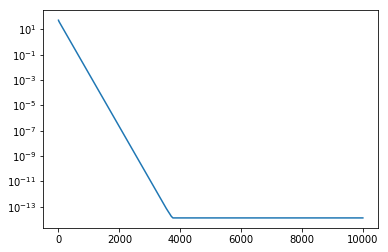

In [35]:
l = arange(it)
matplotlib.pyplot.plot(l, err[l])
matplotlib.pyplot.yscale('log')

## Gauss-Seidel

$$ 
x_i^{k+1} = \frac{1}{A_{ii}} \times \left(b_i - \sum_{j=0}^{i-1} a_{ij}x_j^{k+1} - \sum_{j=i+1}^{N} a_{ij}x_j^k\right)
$$

In [7]:
def gauss_seidel(A,b,nmax=10000, eps=1e-10):
    pass # TODO

sol_gauss_seidel = gauss_seidel(A, f)
print(linalg.norm(sol_gauss_seidel - u)/linalg.norm(u))

2390 9.9530299764e-11
9.57731380802e-11


   ## Gradient method
   $$
   {\bf r}^k = {\bf b} - A {\bf x}^k
   $$
   
   $$
   \alpha^k = \frac{{\bf r}^{k^{T}} {\bf r}^k}{{\bf r}^{k^{T}} A{\bf r}^k}
   $$
   
   $$
   {\bf x}^{k+1} = {\bf x}^k + \alpha^k {\bf r}^k
   $$
   
   ### Preconditioned gradient method
   $$
   P{\bf z}^k =  {\bf r}^k
   $$
   
   $$
   \alpha^k = \frac{{\bf z}^{k^{T}} {\bf r}^k}{{\bf z}^{k^{T}} A{\bf z}^k}
   $$
 
   $$
   {\bf x}^{k+1} = {\bf x}^k + \alpha^k {\bf z}^k
   $$ 
   
   $$
   {\bf r}^{k+1} = {\bf r}^k  - \alpha^k A{\bf z}^k
   $$

In [8]:
def gradient(A, b, P, nmax=8000, eps=1e-10):
    pass # TODO
    
sol_gradient = gradient(A, f, identity(len(A)))
print(linalg.norm(sol_gradient - u)/linalg.norm(u))
sol_preconditioned_gradient = gradient(A, f, A)
print(linalg.norm(sol_preconditioned_gradient - u)/linalg.norm(u))

3909 9.94753934189e-11
7.09530597579e-11
1 1.20640538134e-14
2.68805760723e-15


## Conjugate gradient
   
   $$
   \alpha^k = \frac{{\bf p}^{k^{T}} {\bf r}^k}{{\bf p}^{k^{T}} A{\bf p}^k}
   $$
   
      
   $$
   {\bf x}^{k+1} = {\bf x}^k + \alpha^k {\bf p}^k
   $$
   
   $$
   {\bf r}^{k+1} = {\bf r}^k - \alpha^kA {\bf p}^k
   $$

   $$
   \beta^k = \frac{(A{\bf p}^{k})^{T}{\bf r}^{k+1}}{(A{\bf p}^{k})^{T}  {\bf p}^k}
   $$
   
   $$
   {\bf p}^{k+1} = {\bf r}^{k+1} - \beta^k{\bf p}^k
   $$

   
   ### Preconditioned conjugate gradient
   
   
   $$
   \alpha^k = \frac{{\bf p}^{k^{T}} {\bf r}^k}{(A{\bf p}^{k})^{T}{\bf p}^k}
   $$
   
      
   $$
   {\bf x}^{k+1} = {\bf x}^k + \alpha^k {\bf p}^k
   $$
   
   $$
   {\bf r}^{k+1} = {\bf r}^k - \alpha^kA {\bf p}^k
   $$

$$
P{\bf z}^{k+1} = {\bf r}^{k+1}
$$

   $$
   \beta^k = \frac{(A{\bf p}^{k})^{T}{\bf z}^{k+1}}{{\bf p}^{k^T}A  {\bf p}^k}
   $$
   
   $$
   {\bf p}^{k+1} = {\bf z}^{k+1} - \beta^k{\bf p}^k
   $$


In [13]:
def conjugate_gradient(A, b, P, nmax=len(A), eps=1e-10):
    pass # TODO

sol_conjugate_gradient = conjugate_gradient(A, f, identity(len(A)))
print(linalg.norm(sol_conjugate_gradient - u)/linalg.norm(u))

16 2.70422126826e-17
2.90303183784e-15
